In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')



In [2]:
from problog.program import PrologString
from problog.prolog_engine.translate import TranslatedProgram, translate_clasusedb
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.formula import LogicFormula
from graphviz import Source
from problog.sdd_formula import SDD

In [3]:
file = '''
a(Y) :-\+b(X), c(Y).
0.5::b(0).
c(X) :- d(X).
d(0).
0.5::d(1).
'''
program = PrologString(file)
engine = DefaultEngine()
db = engine.prepare(program)

# ProbLog

In [4]:
formula = LogicFormula(keep_all=True)
ground = engine.ground_all(db, target=formula, queries=[Term('a',Var('Y'))])
print(ground)


1: atom(identifier=8, probability=0.5, group=None, name=b(0), source=b(0), is_extra=False)
2: atom(identifier=12, probability=None, group=None, name=d(0), source=d(0), is_extra=False)
3: atom(identifier=13, probability=0.5, group=None, name=d(1), source=d(1), is_extra=False)
4: conj(children=(-1, 2), name=a(0))
5: conj(children=(-1, 3), name=a(1))
Queries : 
* a(0) : 4 [query]
* a(1) : 5 [query]



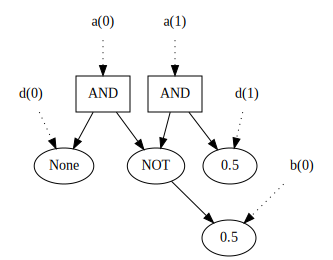

In [5]:
Source(ground.to_dot())

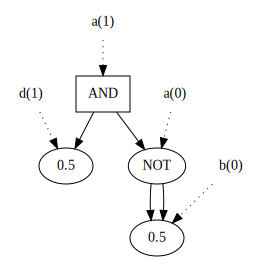

In [6]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [7]:
ac.evaluate()

{a(0): 0.5, a(1): 0.25}

# New engine

In [8]:
translated = translate_clasusedb(db)
print(translated)

ad([p(1.0,a(A1))],[neg(b(A2)),c(A1)]).
ad([p(0.5,b(0))],[]).
ad([p(1.0,c(A1))],[d(A1)]).
ad([p(1.0,d(0))],[]).
ad([p(0.5,d(1))],[]).


In [9]:
proofs = translated.get_proofs('a(X)')
print(proofs)

[(a(0), [(0.5, b(0), True), (1.0, d(0), False)]), (a(1), [(0.5, b(0), True), (0.5, d(1), False)])]


In [10]:
formula2 = translated.ground_all('a(X)', LogicFormula(keep_all=True))
print(formula2)

1: atom(identifier=b(0), probability=0.5, group=None, name=b(0), source=b(0), is_extra=False)
2: atom(identifier=d(0), probability=None, group=None, name=d(0), source=d(0), is_extra=False)
3: conj(children=(-1, 2), name=a(0))
4: atom(identifier=d(1), probability=0.5, group=None, name=d(1), source=d(1), is_extra=False)
5: conj(children=(-1, 4), name=a(1))
Queries : 
* a(0) : 3 [query]
* a(1) : 5 [query]



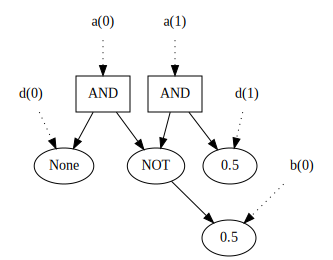

In [11]:

Source(formula2.to_dot())

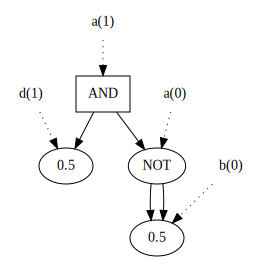

In [12]:
ac2 = SDD.create_from(formula2)
Source(ac2.to_dot())

In [13]:
ac2.evaluate()


{a(0): 0.5, a(1): 0.25}